# Logistic Regression

## Resources:

[Logistic Regression Tutorial for Machine Learning](http://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)

[Logistic Regression for Machine Learning](http://machinelearningmastery.com/logistic-regression-for-machine-learning/)

[How To Implement Logistic Regression With Stochastic Gradient Descent From Scratch With Python](http://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/)

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.


### Description

#### Logistic Regression

Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The logistic function, also called the **Sigmoid function** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.21.6
1.1.5
3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:59:23) 
[Clang 11.1.0 ]
0.21.2


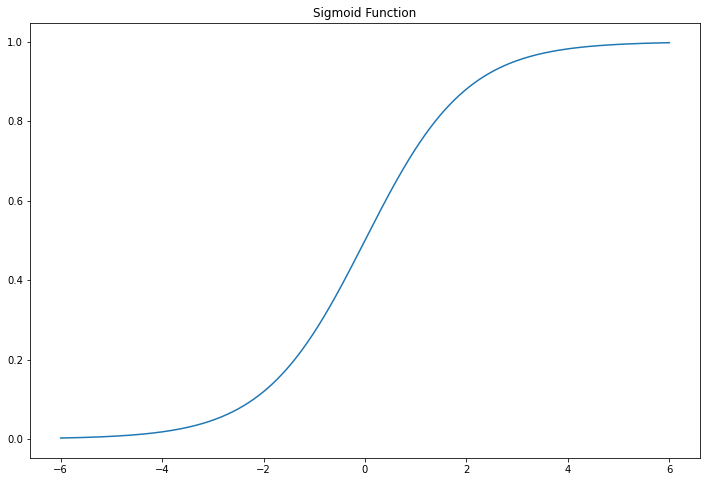

In [2]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (12,8))
plt.plot(x, 1 / (1 + np.exp(-x))); # Sigmoid Function
plt.title("Sigmoid Function");

***

The logistic regression equation has a very simiar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

or

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_1$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

In [4]:
tmp = [0, 0.4, 0.6, 0.8, 1.0]

In [5]:
tmp

[0, 0.4, 0.6, 0.8, 1.0]

In [6]:
np.round(tmp)

array([0., 0., 1., 1., 1.])

In [7]:
np.array(tmp) > 0.7

array([False, False, False,  True,  True])

***

# Making Predictions with Logistic Regression

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_i}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_i$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

In [8]:
dataset = [[-2.0011, 0],
           [-1.4654, 0],
           [0.0965, 0],
           [1.3881, 0],
           [3.0641, 0],
           [7.6275, 1],
           [5.3324, 1],
           [6.9225, 1],
           [8.6754, 1],
           [7.6737, 1]]

Let's say you have been provided with the coefficient

In [9]:
coef = [-0.806605464, 0.2573316]

In [10]:
for row in dataset:
    yhat = 1.0 / (1.0 + np.exp(- coef[0] - coef[1] * row[0]))
    print("yhat {0:.4f}, yhat {1}".format(yhat, round(yhat)))

yhat 0.2106, yhat 0
yhat 0.2344, yhat 0
yhat 0.3139, yhat 0
yhat 0.3895, yhat 0
yhat 0.4955, yhat 0
yhat 0.7606, yhat 1
yhat 0.6377, yhat 1
yhat 0.7261, yhat 1
yhat 0.8063, yhat 1
yhat 0.7628, yhat 1


***

# Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. 

* Generally done using [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

* Maximum-likelihood estimation is a common learning algorithm

* Note the underlying assumptions about the distribution of your data

* The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. 

* The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data.

# Learning with Stochastic Gradient Descent

Logistic Regression uses gradient descent to update the coefficients.

Each gradient descent iteration, the coefficients are updated using the equation:

$$\beta=\beta+\textrm{learning rate}\times (y-\hat{y}) \times \hat{y} \times (1-\hat{y}) \times x $$


***

# Using Scikit Learn to Estimate Coefficients

In [11]:
from sklearn.linear_model import LogisticRegression

/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html

In [12]:
dataset

[[-2.0011, 0],
 [-1.4654, 0],
 [0.0965, 0],
 [1.3881, 0],
 [3.0641, 0],
 [7.6275, 1],
 [5.3324, 1],
 [6.9225, 1],
 [8.6754, 1],
 [7.6737, 1]]

In [14]:
X = np.array(dataset)[:, 0:1]
y = np.array(dataset)[:, 1]

In [15]:
X

array([[-2.0011],
       [-1.4654],
       [ 0.0965],
       [ 1.3881],
       [ 3.0641],
       [ 7.6275],
       [ 5.3324],
       [ 6.9225],
       [ 8.6754],
       [ 7.6737]])

In [16]:
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [17]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001, solver="lbfgs")

In [18]:
clf_LR.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
clf_LR.predict(X)

/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [23]:
clf_LR.predict_proba(X) #probability of each class

array([[0.99853453, 0.00146547],
       [0.99740804, 0.00259196],
       [0.98643844, 0.01356156],
       [0.94830288, 0.05169712],
       [0.75430207, 0.24569793],
       [0.02307807, 0.97692193],
       [0.21456501, 0.78543499],
       [0.04771639, 0.95228361],
       [0.00766657, 0.99233343],
       [0.02199284, 0.97800716]])

# Further Resources

[A comparison of numerical optimizers for logistic regression](https://tminka.github.io/papers/logreg/)

[PDF: A comparison of numerical optimizers for logistic regression](https://tminka.github.io/papers/logreg/minka-logreg.pdf)

***

# Classification Exercise

In [24]:
dataset2 = [[ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.4,  0. ],
            [ 0.3,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.1,  0. ],
            [ 1.4,  1. ],
            [ 1.5,  1. ],
            [ 1.5,  1. ],
            [ 1.3,  1. ],
            [ 1.5,  1. ],
            [ 1.3,  1. ],
            [ 1.6,  1. ],
            [ 1. ,  1. ],
            [ 1.3,  1. ],
            [ 1.4,  1. ]]

In [25]:
X = np.array(dataset2)[:, 0:1]
y = np.array(dataset2)[:, 1]

In [26]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001, solver='lbfgs')

clf_LR.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = clf_LR.predict(X)
clf_LR.predict(X)

/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [28]:
np.column_stack((y_pred, y))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [34]:
clf_LR.predict(np.array([0.2]).reshape(1,-1))

/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0.])

In [32]:
clf_LR.predict(np.array([0.4]).reshape(1,-1))

/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0.])

In [33]:
clf_LR.predict(np.array([0.9]).reshape(1,-1))

/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([1.])

In [35]:
clf_LR.predict(np.array([1.5]).reshape(1,-1))

/opt/miniconda3/envs/ml_python_2019/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([1.])

***